<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/master/example01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験Ⅳ－１　正則化付き重回帰モデル

1. サンプルデータの読み込み
1. 線形重回帰の実行
1. 正則化付き基底展開重回帰の実行



In [1]:
!pip install japanize-matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## Google Colaboratory でファイルを読み込む

以下の方法があります。

1. ファイルをアップロードする
1. URL を指定する

In [2]:
# ファイルをアップロードする
#from google.colab import files
#uploaded_file = files.upload()
#file_name = next(iter(uploaded_file))
#print(file_name)

# URLを指定する
filename = 'https://raw.githubusercontent.com/msiplab/EicEngLabIV/master/data/sample01_02.csv'

#観測データのファイル
#filename = './data/practice01_02.csv'
#filename = './data/sample01_02.csv'

In [3]:
#観測データ（空白区切り）の読み込み
#dataset = pd.read_csv(filename, delim_whitespace=True)
dataset = pd.read_csv(filename)
display(dataset)


,Unnamed: 0,0.0,42.10526315789474,84.21052631578948,126.31578947368422,168.42105263157896,210.5263157894737,252.63157894736844,294.7368421052632,336.8421052631579,378.94736842105266,421.0526315789474,463.15789473684214,505.2631578947369,547.3684210526317,589.4736842105264,631.578947368421,673.6842105263158,715.7894736842106,757.8947368421053,800.0
0,0.000000,16.217848,171.693216,285.435032,359.062476,414.996920,443.611665,459.025305,462.037962,495.302553,471.721179,492.323003,508.270763,513.286433,480.846946,494.010960,511.235270,506.344952,502.453660,494.975104,507.541509
1,0.001111,-0.929985,157.759336,258.730186,315.218600,360.524318,405.754791,426.747235,420.972403,432.641375,422.366285,453.518300,451.211646,452.325676,442.494015,439.012794,444.041384,451.683205,453.924354,437.514557,447.017121
2,0.002222,-0.550676,126.148260,209.868070,272.214234,335.795413,356.016337,355.390410,386.054813,393.449116,392.187385,399.011950,387.610680,395.580039,394.086794,401.330280,399.823777,401.947967,426.627676,406.164878,404.713887
3,0.003333,-9.878340,111.402050,223.288533,251.192129,259.185952,304.286736,328.824257,343.842558,356.813546,364.184196,356.545854,357.376816,362.357688,360.090619,363.368194,348.389623,358.764222,360.812787,346.571589,361.649627
4,0.004444,6.853057,122.962178,178.098023,216.024491,261.624874,294.269334,302.277081,310.546666,301.439705,322.143644,323.924645,326.253517,313.574930,313.657354,318.426397,328.978162,340.383883,308.395057,323.627593,329.536380
5,0.005556,6.205687,98.465527,162.170448,212.135979,260.112512,244.785343,261.130322,270.508223,281.044052,273.648458,277.235738,285.361497,281.623107,278.868529,295.391211,294.210364,282.808870,290.354298,291.484547,293.222563
6,0.006667,-26.646547,90.983584,157.423395,187.721220,204.306257,226.150857,234.803392,269.577045,263.993109,245.971510,259.449402,240.381526,249.014036,261.729612,245.482895,261.930741,270.188723,251.347340,246.491004,271.806537
7,0.007778,-12.527963,62.597410,118.640144,149.391525,181.916326,208.239338,198.564503,221.816534,228.557436,231.321587,224.021326,243.929210,236.327591,226.069380,215.584072,237.100272,230.813075,215.957310,206.327599,239.350849
8,0.008889,5.118938,68.050144,108.081550,151.299217,157.964661,197.181849,205.090056,188.477352,215.661976,198.181335,179.091732,194.374918,210.941215,185.892124,219.782343,197.101919,208.454555,196.559415,180.303771,207.388827
9,0.010000,-19.587301,43.803094,119.797238,140.728864,139.179686,160.440337,136.276042,182.712772,185.388154,191.402877,180.962741,169.736987,178.319765,192.506952,194.088801,181.238388,164.401976,203.086555,174.881364,166.540509


## データの整形

以下では、二次元テーブルデータの読み込みを想定しています。

1. 説明変数の整形（メッシュグリッド化）
1. 目的変数の抽出


In [4]:
# 説明変数x1（ヘッダの読み込み）
x1 = dataset.columns[1:].astype(float).values
display(x1)
# 説明変数x2（１列目の読み込み）
x2 = dataset.iloc[:,0].astype(float).values
display(x2)

# 説明変数x1,x2の設定（メッシュグリッド）
x1,x2 = np.meshgrid(x1,x2) 
display(x1)
display(x2)

# 目的変数yの設定
y = dataset.iloc[0:,1:].astype(float).values
display(y)

# 総観測点数の抽出
nSamples = y.size

array([  0.        ,  42.10526316,  84.21052632, 126.31578947,
       168.42105263, 210.52631579, 252.63157895, 294.73684211,
       336.84210526, 378.94736842, 421.05263158, 463.15789474,
       505.26315789, 547.36842105, 589.47368421, 631.57894737,
       673.68421053, 715.78947368, 757.89473684, 800.        ])

array([0.        , 0.00111111, 0.00222222, 0.00333333, 0.00444444,
       0.00555556, 0.00666667, 0.00777778, 0.00888889, 0.01      ])

array([[  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111],
       [0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222],
       [0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0

array([[ 16.21784832, 171.69321597, 285.43503209, 359.06247627,
        414.99691966, 443.6116646 , 459.02530549, 462.03796179,
        495.30255251, 471.72117931, 492.32300253, 508.27076266,
        513.2864328 , 480.84694619, 494.01096048, 511.23526968,
        506.3449524 , 502.45365964, 494.97510449, 507.5415091 ],
       [ -0.92998546, 157.75933569, 258.73018589, 315.21860038,
        360.52431806, 405.7547906 , 426.74723472, 420.97240349,
        432.6413754 , 422.3662852 , 453.51829994, 451.21164641,
        452.32567633, 442.49401544, 439.01279397, 444.04138369,
        451.6832054 , 453.92435446, 437.51455693, 447.01712054],
       [ -0.55067613, 126.14826026, 209.86806971, 272.21423426,
        335.79541305, 356.01633741, 355.39041022, 386.05481299,
        393.44911614, 392.18738511, 399.01195036, 387.61067999,
        395.58003888, 394.08679448, 401.33028035, 399.82377657,
        401.94796664, 426.62767599, 406.16487794, 404.71388731],
       [ -9.87833954, 111.40205044, 2

## 観測データの散布図
- データの値の範囲を抽出
- (x1,y), (x2,y)の散布図を描画


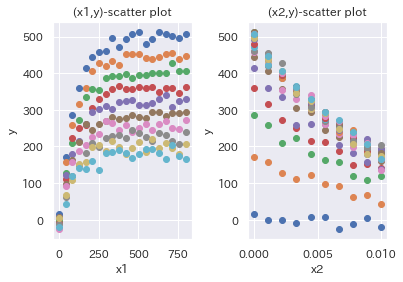

In [5]:
from mpl_toolkits import mplot3d

# 散布図の範囲情報の抽出
minx1 = np.min(x1)
maxx1 = np.max(x1)
rx1 = maxx1-minx1
cx1 = 0.5*rx1
minx2 = np.min(x2)
maxx2 = np.max(x2)
rx2 = maxx2-minx2
cx2 = 0.5*rx2

# 散布図の表示
fig, axs = plt.subplots(1, 2, figsize=(6,4))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
# (x1,y)
for irow in range(y.shape[0]):
    axs[0].scatter(x1[irow,:],y[irow,:])
axs[0].set_title('(x1,y)-scatter plot')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('y')
# (x2,y)
for icol in range(y.shape[1]):
    axs[1].scatter(x2[:,icol],y[:,icol])
axs[1].set_title('(x2,y)-scatter plot')
axs[1].set_xlabel('x2')
axs[1].set_ylabel('y')
#
axs[0].grid(True)
axs[1].grid(True)
plt.show()




# 三次元散布図の描画


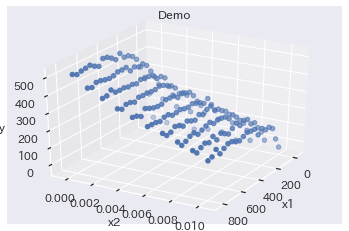

In [6]:

# 三次元散布図の表示
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1,x2,y)
ax.set_title('Demo')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 線形重回帰の実行

- sklearn.linear_model.LinearRegression を利用

In [7]:
from sklearn.linear_model import LinearRegression

# 線形単回帰のインスタンス生成
regm = LinearRegression()

# 線形重回帰分析
Xdata = np.concatenate([x1.reshape(-1,1), x2.reshape(-1,1)],axis=1) # データ行列生成
ydata = y.reshape(-1,1) # 列ベクトル化
regm.fit(Xdata,ydata) # 最小２乗法

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# 推定結果
beta0 = regm.intercept_[0]
beta1 = regm.coef_[0][0]
beta2 = regm.coef_[0][1]
print("β0 = {0:5.2f} ".format(beta0))
print("β1 = {0:5.2f} ".format(beta1))
print("β2 = {0:5.2f} ".format(beta2))

β0 = 306.50 
β1 =  0.25 
β2 = -27140.07 


### 3次元散布図と曲面の表示

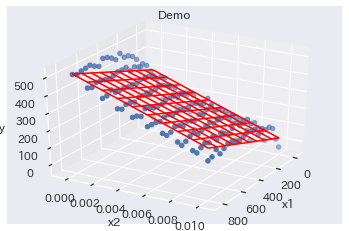

In [9]:
nPoints = 10
fig = plt.figure()
ax = plt.axes(projection='3d')
xfit1,xfit2 = np.meshgrid(np.linspace(minx1,maxx1,nPoints),
                          np.linspace(minx2,maxx2,nPoints))
Xfit  = np.concatenate([xfit1.reshape(-1,1),xfit2.reshape(-1,1)],axis=1)
yfit  = regm.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title('Demo')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 基底展開重回帰モデルのパラメータの選択

- RBF重回帰（K平均法を利用した2段階推定クラスを定義）
- 交差検証正則化モデル（(sklearn.linear_model.LassoCV/RigdeCV）を利用


In [10]:
"""GaussianFeaturesWithKmenasモジュール

    Copyright (c) 2020, Shogo MURAMATSU, All rights reserved.
"""
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeaturesWithKmeans(BaseEstimator, TransformerMixin):
    """K平均法を利用した2段階推定法によるガウス基底関数

        scikit-learn LinearRegression推定器に渡すためのガウス基底関数による
        特徴量への変換クラス    

    Attirbutes:
        nbfs (int): 基底関数の数
        centers_ (numpy.ndarray): 各ガウス関数の中心
        widths_ (numpy.ndarray): 各ガウス関数の幅

    References:

        * 小西貞則「多変量解析入門－線形から非線形へ－」岩波書店
        * Jake VanderPlas（菊池彰訳）「Pythonデータサイエンスハンドブック」オライリージャパン
    """
    def __init__(self, nbfs, width_factor=1.0, prekmeans=True):
        """GaussianFeaturesWithKMeansのコンストラクタ"""
        self.nbfs = nbfs
        self.width_factor = width_factor
        self.prekmeans = prekmeans

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / (width + 1e-300)
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        ndims = X.shape[1]
        if self.prekmeans: # K平均法を前処理に利用
            # 説明変数の標準化とK平均法の実行
            scaler = StandardScaler()         
            kmeans = KMeans(n_clusters=self.nbfs,random_state=0)
            X = scaler.fit_transform(X) 
            kmeans.fit(X) 
            # クラスタラベルの抽出
            labels = kmeans.predict(X).reshape(-1,1)            
            # 各クラスタの中心と幅を抽出
            clusters = pd.DataFrame(np.concatenate((labels,X),axis=1)).groupby([0])
            centers = scaler.inverse_transform(kmeans.cluster_centers_) 
            widths = (self.width_factor * scaler.scale_ * clusters.std(ddof=0)).to_numpy()
            #プライベート静的メソッド_gauss_basisでブロードキャスト計算するために成形
            if ndims == 1:
                self.centers_ = centers.reshape(-1,)
                self.widths_ = widths.reshape(-1,)
            else:
                self.centers_ = centers.reshape(-1,ndims,1).transpose(2,1,0) 
                self.widths_ = widths.reshape(-1,ndims,1).transpose(2,1,0)
        else: # 等間隔にガウス基底を配置（単変量のみ）
            if ndims == 1:
                centers = np.linspace(X.min(), X.max(), self.nbfs) 
                self.centers_ = centers
                self.widths_ = self.width_factor * (centers[1] - centers[0]) * np.ones(self.nbfs)
            else:
                raise Exception('prekmeansを True に設定してください．重回帰はK平均法による事前推定のみ対応しています．') 
        
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:,:, np.newaxis], self.centers_,
                                self.widths_, axis=1)

### 正則化付き重回帰モデルの評価
- リッジ交差検証(CV)モデル
- ラッソ交差検証(CV)モデル

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# ラッソ回帰の選択
isLasso = True # False の場合はリッジ回帰を選択

# RFB重回帰の選択
isRBF = True # False の場合は多項式重回帰を選択
width_factor = 4.0 # ガウス関数の広さ

# 正則化法の選択
if isLasso: # ラッソ正則化交差検証(CV)モデル
    reg = LassoCV(alphas=np.logspace(-8,2,50))
else: # リッジ正則化交差検証(CV)モデル
    reg = RidgeCV(alphas=np.logspace(-8,2,50))

# 基底展開法の特徴量を選択
if isRBF: # RBF単回帰モデル
    # 評価する基底数の最大値（回帰分析が不安定になるときは値を減らして試す）
    maxdeg = 30
    phi = GaussianFeaturesWithKmeans(nbfs=maxdeg,width_factor=width_factor)
else: # 多項式単回帰モデル
    # 評価する基底数の最大値（回帰分析が不安定になるときは値を減らして試す）
    maxdeg = 10
    phi = PolynomialFeatures(degree=maxdeg,include_bias=False)
        
# 基底展開重回帰モデルのインスタンス生成
regmp = make_pipeline(phi,reg)
# 基底展開重回帰分析
regmp.fit(Xdata,ydata)



Pipeline(memory=None,
         steps=[('gaussianfeatureswithkmeans',
                 GaussianFeaturesWithKmeans(nbfs=30, prekmeans=True,
                                            width_factor=4.0)),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-08, 1.59985872e-08, 2.55954792e-08, 4.09491506e-08,
       6.55128557e-08, 1.04811313e-07, 1.67683294e-07, 2.68269580e-07,
       4.29193426e-07, 6.86648845e-07, 1.09854114e-06, 1.75751062e-06,
       2.81176870...
       1.45634848e+00, 2.32995181e+00, 3.72759372e+00, 5.96362332e+00,
       9.54095476e+00, 1.52641797e+01, 2.44205309e+01, 3.90693994e+01,
       6.25055193e+01, 1.00000000e+02]),
                         copy_X=True, cv=None, eps=0.001, fit_intercept=True,
                         max_iter=1000, n_alphas=100, n_jobs=None,
                         normalize=False, positive=False, precompute='auto',
                         random_state=None, selection='cyclic', tol=0.0001,
                       

In [12]:
if isRBF: # RBF重回帰モデル
    nCoefs = maxdeg+1
else: # 多項式重回帰モデル
    nCoefs = int((maxdeg+1)*(maxdeg+2)/2) # (n+1)(n+2)/2

# 最適パラメータの推定結果
alpha = regmp[1].alpha_
print("λ = {0:5.2e} ".format(alpha))
w0 = regmp[1].intercept_
if not isLasso:
    w0 = w0[0]
print("w0 = {0:5.2f} ".format(w0))
for idx in range(0,nCoefs-1):
    if isLasso:
        w = regmp[1].coef_[idx]
    else:
        w = regmp[1].coef_[0][idx]
    print("w{0:d} = {1:5.2f} ".format(idx+1,w))


λ = 1.39e-01 
w0 = 171.68 
w1 = 181.08 
w2 = -4.85 
w3 = -150.54 
w4 = -0.00 
w5 =  0.00 
w6 = 42.77 
w7 = -50.82 
w8 = 29.83 
w9 = -0.00 
w10 =  0.00 
w11 = -57.51 
w12 = 34.39 
w13 =  0.00 
w14 =  0.00 
w15 = -191.08 
w16 = 41.95 
w17 = 268.97 
w18 = -170.11 
w19 = -0.00 
w20 =  0.00 
w21 =  0.00 
w22 = 311.12 
w23 = -0.00 
w24 =  0.00 
w25 =  0.00 
w26 =  0.00 
w27 = 79.33 
w28 = -0.00 
w29 = 149.74 
w30 = -5.88 


### 3次元散布図と曲面の表示

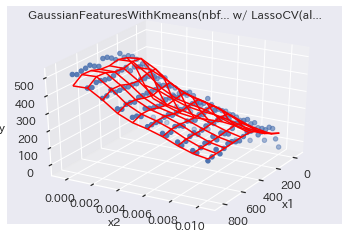

In [13]:
# 回帰曲面をプロット
fig = plt.figure()
ax = plt.axes(projection='3d')
yfit = regmp.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title("{0}... w/ {1}...".format(str(regmp[0])[:30],str(regmp[1])[:10]))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()